# Medical Insurance Prediction

**Aim** - To Find the health insurance cost incured by individuals based on their age, gender, BMI, number of children, smoking habit and geo-location

**Loading the Libraries and Dataset**

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [64]:
data = pd.read_csv('insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Exploratory Data Analysis**

In [65]:
print('The length of the dataset: ',len(data))
print('Number of Features: ', len(data.columns))

The length of the dataset:  1338
Number of Features:  7


In [66]:
# To check whether any null values is there

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Note** - There is no null values in the dataset

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Note**: 3 Features (sex, smoker, region) needed to be feature engineered

In [68]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Note**
- Age varies from 18 - 64
- BMI varies from 15.96 - 53.13
- Children varies from 0 - 5
- Charges varies from 1121 - 63770

In [69]:
data_region = data.groupby('region').mean()
data_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


**Note** - Southwest region has the highest average BMI & Charges 

In [70]:
data_agecharge = data.groupby(['age','smoker']).charges.mean()
print(data_agecharge.head(20))

age  smoker
18   no         3215.162259
     yes       25473.730221
19   no         3536.712898
     yes       27001.232768
20   no         3673.112925
     yes       24574.330650
21   no         3813.530413
     yes       16650.605250
22   no         2551.017880
     yes       37373.287517
23   no         5980.978162
     yes       31736.345671
24   no         5587.430232
     yes       29203.496972
25   no         5547.187943
     yes       29577.781200
26   no         4166.516168
     yes       22528.068150
27   no         5800.976874
     yes       25661.454178
Name: charges, dtype: float64


**Note** - Age & Charges & Smoker relationship
- From the data is clear that, if you are a smoker the charges increases when compared to non-smokers

In [71]:
data_gender = data.groupby(['age','sex']).smoker.count()
print(data_gender.head(20))

age  sex   
18   female    33
     male      36
19   female    33
     male      35
20   female    14
     male      15
21   female    13
     male      15
22   female    13
     male      15
23   female    14
     male      14
24   female    14
     male      14
25   female    13
     male      15
26   female    13
     male      15
27   female    14
     male      14
Name: smoker, dtype: int64


**Note** Age & Gender & Smoker Relationship
-  From it is clear that, both genders are approximately equal in being a smoker irrespective of their ages

**Feature Engineering**

In [72]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [73]:
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [74]:
data.sex.unique()

array([0, 1], dtype=int64)

In [75]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [76]:
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [77]:
data.smoker.unique()

array([1, 0], dtype=int64)

In [78]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [79]:
region_dummies = pd.get_dummies(data['region'], drop_first = True)

In [80]:
region_dummies.head(5)

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [81]:
data = pd.concat([data, region_dummies], axis=1)

In [82]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [83]:
data.drop(['region'], axis=1, inplace=True)

In [84]:
data.head(5)

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


**Note** -  Feature Engineering is done

**Visualize the dataset** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BCE26875F8>,
      dtype=object)

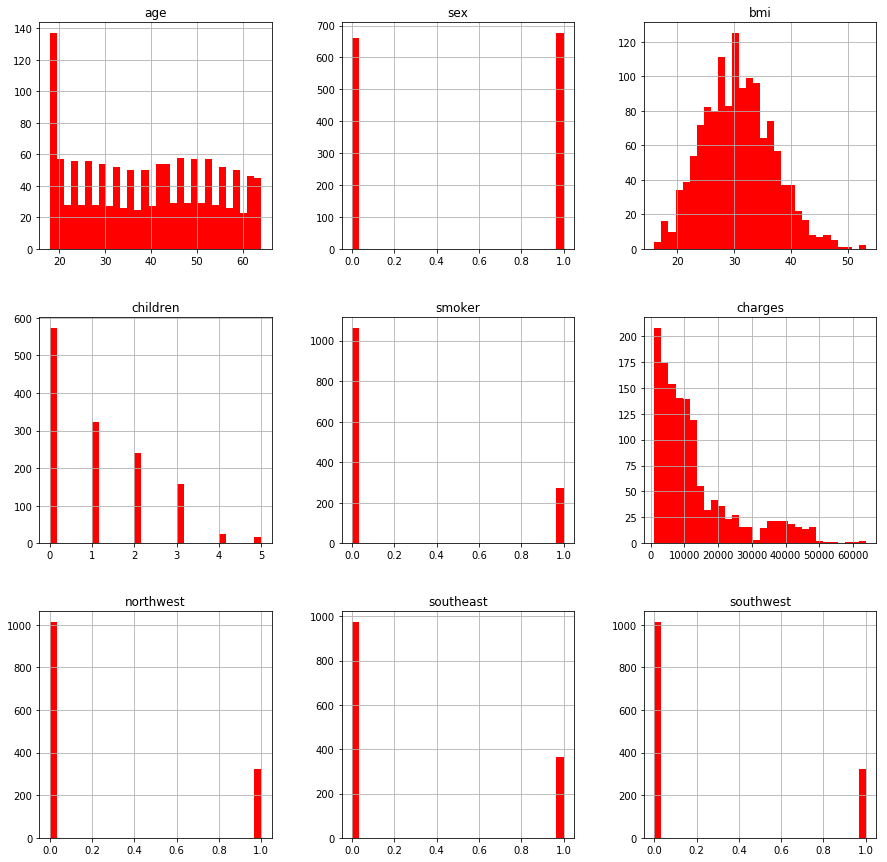

In [85]:
data.hist(bins=30, figsize = (15,15), color = 'r')

**Note** - 
- 18 - 20 age people are more
- Gender wise, both gender distribution is approximately same
- Most of the people BMI is in range of 27-30
- In terms of childrens, most of the people have zero childres, that means lot of young populatipn exists
- Most of them are non-smokers
- Most of the charges are in range of  2,000 - 15,000  

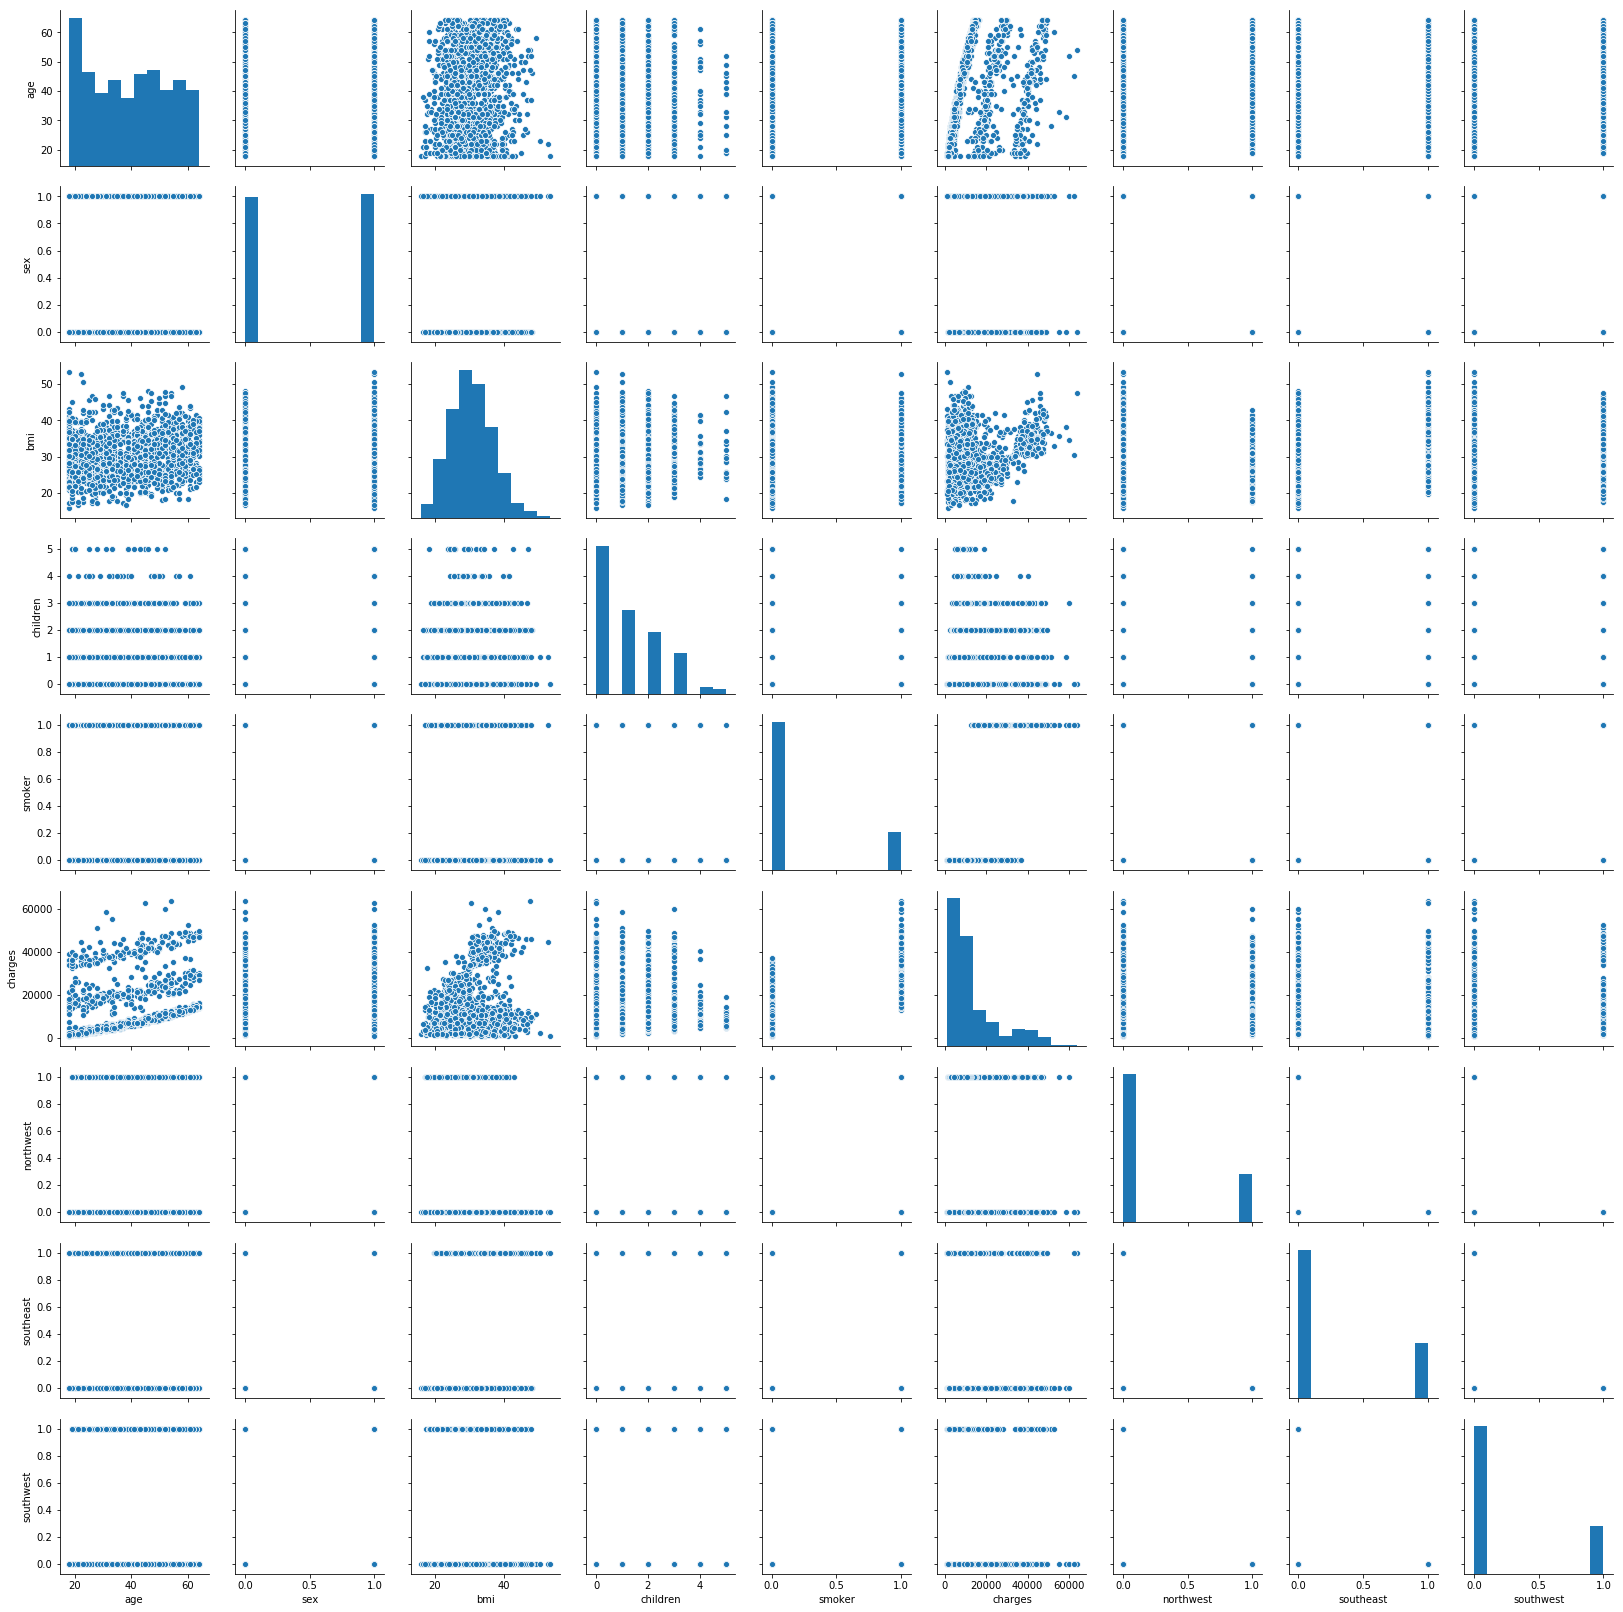

In [86]:
sns.pairplot(data)

**Note -**
- Age and charges have postive correlation
- BMI and charges have positive correlation

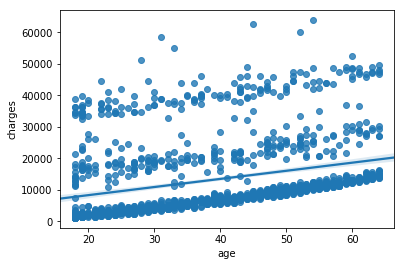

In [87]:
sns.regplot(x='age',y='charges', data=data)
plt.show()

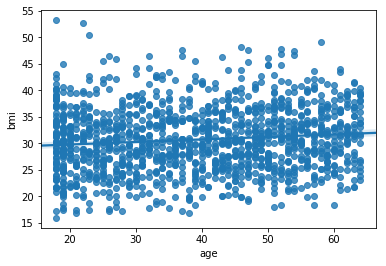

In [88]:
sns.regplot(x='age',y='bmi', data=data)
plt.show()

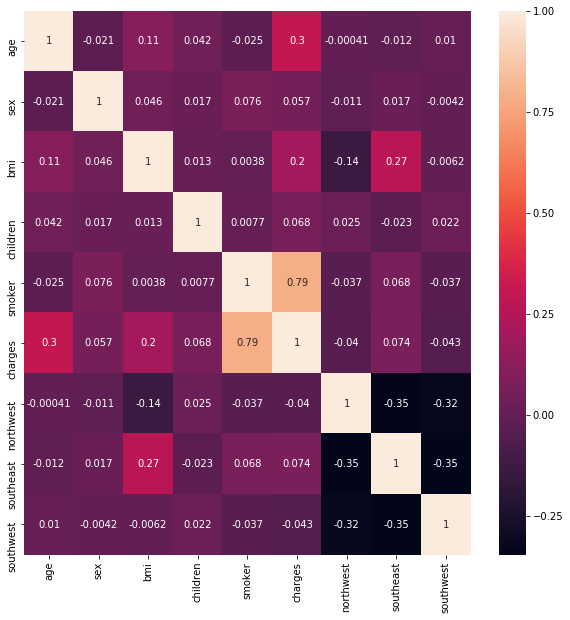

In [89]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot=True)

**Note -**
- Charges has with positive correlation with smoker(highest), then age & BMI 

**Creating Training & Testing Dataset**

In [90]:
X = data.drop(['charges'],axis=1)
Y = data.charges

In [91]:
X.shape, Y.shape

((1338, 8), (1338,))

In [92]:
X = np.array(X).astype('float32')
Y = np.array(Y).astype('float32')

In [93]:
X.shape, Y.shape

((1338, 8), (1338,))

In [94]:
Y = Y.reshape(-1,1)

In [95]:
X.shape, Y.shape

((1338, 8), (1338, 1))

In [96]:
# Scaling

scalar = StandardScaler()
X = scalar.fit_transform(X)
Y = scalar.fit_transform(Y)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [98]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070, 1), (268, 1))

**Training the AI Model (Machine Learning - Linear Regression)**

In [99]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [100]:
accuracy_train = model.score(x_test,y_test)
print('Train Accuracy', accuracy_train)

accuracy_test = model.score(x_test,y_test)
print('Test Accuracy', accuracy_test)

Train Accuracy 0.7835929939299844
Test Accuracy 0.7835929939299844


In [101]:
y_predict = model.predict(x_test)

In [102]:
print(y_predict)

[[-3.55282456e-01]
 [-5.12302399e-01]
 [ 1.94853806e+00]
 [-3.15207839e-01]
 [ 1.13194549e+00]
 [-1.98778778e-01]
 [-1.08216536e+00]
 [ 3.00114065e-01]
 [-1.00598896e+00]
 [-1.69516549e-01]
 [ 1.22516882e+00]
 [-3.21564078e-01]
 [-6.61465406e-01]
 [ 2.07720828e+00]
 [ 2.22918773e+00]
 [ 1.96834958e+00]
 [ 1.62733793e-01]
 [ 1.87043011e+00]
 [-3.43471944e-01]
 [ 1.50274909e+00]
 [-7.78385639e-01]
 [-2.59411663e-01]
 [-9.00408626e-01]
 [-5.06399035e-01]
 [-1.62624508e-01]
 [-2.55060643e-02]
 [ 1.02354921e-01]
 [-5.87380171e-01]
 [-2.73145467e-01]
 [-9.16325927e-01]
 [-3.43189955e-01]
 [-1.62509866e-02]
 [-7.19392776e-01]
 [-8.14689279e-01]
 [-7.27819681e-01]
 [-1.96903348e-02]
 [-9.32670116e-01]
 [-3.68191212e-01]
 [ 1.65221620e+00]
 [ 1.59556520e+00]
 [-7.73340225e-01]
 [-7.38864899e-01]
 [ 7.20662028e-02]
 [-1.52572662e-01]
 [-3.71425778e-01]
 [-9.69098210e-02]
 [-6.59936070e-01]
 [-8.35972905e-01]
 [ 1.83586514e+00]
 [-3.40367794e-01]
 [ 2.12005273e-01]
 [-9.02636528e-01]
 [-7.4812114

In [103]:
y_predict_org = scalar.inverse_transform(y_predict)
y_test_org = scalar.inverse_transform(y_test)

In [104]:
print(y_predict_org)

[[ 8969.556   ]
 [ 7068.7534  ]
 [36858.42    ]
 [ 9454.679   ]
 [26973.172   ]
 [10864.108   ]
 [  170.28554 ]
 [16903.45    ]
 [ 1092.4379  ]
 [11218.342   ]
 [28101.686   ]
 [ 9377.733   ]
 [ 5263.0625  ]
 [38416.035   ]
 [40255.82    ]
 [37098.25    ]
 [15240.394   ]
 [35912.887   ]
 [ 9112.527   ]
 [31461.928   ]
 [ 3847.687   ]
 [10130.118   ]
 [ 2370.5396  ]
 [ 7140.2163  ]
 [11301.773   ]
 [12961.659   ]
 [14509.479   ]
 [ 6159.9004  ]
 [ 9963.864   ]
 [ 2177.852   ]
 [ 9115.941   ]
 [13073.696   ]
 [ 4561.8237  ]
 [ 3408.2134  ]
 [ 4459.812   ]
 [13032.062   ]
 [ 1979.9984  ]
 [ 8813.289   ]
 [33271.3     ]
 [32585.512   ]
 [ 3908.7642  ]
 [ 4326.104   ]
 [14142.818   ]
 [11423.456   ]
 [ 8774.133   ]
 [12097.282   ]
 [ 5281.576   ]
 [ 3150.565   ]
 [35494.46    ]
 [ 9150.1045  ]
 [15836.849   ]
 [ 2343.5688  ]
 [12364.785   ]
 [ 1482.2924  ]
 [13389.059   ]
 [12573.572   ]
 [ 4341.8354  ]
 [32165.334   ]
 [13321.343   ]
 [12896.825   ]
 [14168.001   ]
 [10506.174   ]
 [16360.

In [105]:
print(y_test_org)

[[ 9095.068 ]
 [ 5272.176 ]
 [29330.982 ]
 [ 9301.894 ]
 [33750.293 ]
 [ 4536.2593]
 [ 2117.3394]
 [14210.536 ]
 [ 3732.6255]
 [10264.442 ]
 [18259.217 ]
 [ 7256.723 ]
 [ 3947.4136]
 [46151.125 ]
 [48673.56  ]
 [44202.652 ]
 [ 9800.889 ]
 [42969.85  ]
 [ 8233.098 ]
 [21774.322 ]
 [ 5080.096 ]
 [ 7441.501 ]
 [ 1256.2992]
 [ 2755.021 ]
 [11085.587 ]
 [10923.934 ]
 [12644.589 ]
 [18804.752 ]
 [ 9715.841 ]
 [ 1131.5062]
 [15828.821 ]
 [11842.624 ]
 [ 2020.5521]
 [ 5693.4307]
 [ 2904.0884]
 [ 7448.404 ]
 [ 2597.7788]
 [ 7337.748 ]
 [23887.662 ]
 [38709.176 ]
 [ 4687.7974]
 [ 2643.269 ]
 [11674.13  ]
 [12124.992 ]
 [ 4889.9995]
 [12333.828 ]
 [ 3579.8286]
 [ 4391.652 ]
 [42124.516 ]
 [ 4463.2056]
 [13887.204 ]
 [ 1719.4359]
 [28476.734 ]
 [ 1708.9261]
 [10594.226 ]
 [25333.332 ]
 [ 3645.0894]
 [38746.355 ]
 [11848.141 ]
 [10564.885 ]
 [13880.949 ]
 [ 4753.637 ]
 [27941.287 ]
 [ 8017.061 ]
 [23045.566 ]
 [ 4133.642 ]
 [17942.105 ]
 [25992.82  ]
 [ 3594.1714]
 [ 1682.597 ]
 [ 6079.6714]
 [ 941

In [106]:
k = x_test.shape[1]
n = len(x_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_org,y_predict_org)),'.3f'))
MSE = mean_squared_error(y_test_org, y_predict_org)
r2 = r2_score(y_test_org, y_predict_org)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print("Root Mean Square Error: ",RMSE)
print("Mean Squared Error: ", MSE)
print("R2: ", r2)
print("Adjusted R2: ",adj_r2)

Root Mean Square Error:  5796.284
Mean Squared Error:  33596910.0
R2:  0.7835930057311533
Adjusted R2:  0.7769086198077912


**Training AI Model - (DeepLearning)**

**Loading Libraries**

In [107]:
import keras
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import Adam

In [108]:
model = keras.Sequential()
model.add(Dense(50, activation = 'relu', input_dim = 8))
model.add(Dense(150, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(150, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'linear'))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                450       
_________________________________________________________________
dense_7 (Dense)              (None, 150)               7650      
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 150)               22650     
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                7550      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

In [109]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
43/43 [==============================] - 0s 10ms/step - loss: 0.7845 - val_loss: 0.3305
Epoch 2/100
43/43 [==============================] - 0s 4ms/step - loss: 0.3714 - val_loss: 0.2022
Epoch 3/100
43/43 [==============================] - 0s 4ms/step - loss: 0.3081 - val_loss: 0.2075
Epoch 4/100
43/43 [==============================] - 0s 4ms/step - loss: 0.3069 - val_loss: 0.2061
Epoch 5/100
43/43 [==============================] - 0s 5ms/step - loss: 0.2800 - val_loss: 0.1562
Epoch 6/100
43/43 [==============================] - 0s 4ms/step - loss: 0.2613 - val_loss: 0.1869
Epoch 7/100
43/43 [==============================] - 0s 4ms/step - loss: 0.2594 - val_loss: 0.1724
Epoch 8/100
43/43 [==============================] - 0s 9ms/step - loss: 0.2295 - val_loss: 0.1762
Epoch 9/100
43/43 [==============================] - 0s 4ms/step - loss: 0.2465 - val_loss: 0.2016
Epoch 10/100
43/43 [==============================] - 0s 4ms/step - loss: 0.2257 - val_loss: 0.1773
Epoch 11

Epoch 83/100
43/43 [==============================] - ETA: 0s - loss: 0.143 - 0s 4ms/step - loss: 0.1417 - val_loss: 0.1499
Epoch 84/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1412 - val_loss: 0.1470
Epoch 85/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1303 - val_loss: 0.1605
Epoch 86/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1346 - val_loss: 0.1541
Epoch 87/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1387 - val_loss: 0.1675
Epoch 88/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1444 - val_loss: 0.1565
Epoch 89/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1237 - val_loss: 0.1569
Epoch 90/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1392 - val_loss: 0.1592
Epoch 91/100
43/43 [==============================] - 0s 5ms/step - loss: 0.1365 - val_loss: 0.1588
Epoch 92/100
43/43 [==============================] - 0s 4ms/step - loss: 0.

In [115]:
score = model.evaluate(x_test,y_test)
print("Loss: ",score)

9/9 [==============================] - 0s 2ms/step - loss: 0.1624
Loss:  0.16238939762115479


In [116]:
y_predict = model.predict(x_test)

In [117]:
y_predict_org = scalar.inverse_transform(y_predict)
y_test_org = scalar.inverse_transform(y_test)

In [118]:
k = x_test.shape[1]
n = len(x_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_org,y_predict_org)),'.3f'))
MSE = mean_squared_error(y_test_org, y_predict_org)
r2 = r2_score(y_test_org, y_predict_org)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print("Root Mean Square Error: ",RMSE)
print("Mean Squared Error: ", MSE)
print("R2: ", r2)
print("Adjusted R2: ",adj_r2)

Root Mean Square Error:  4878.216
Mean Squared Error:  23796992.0
R2:  0.8467170082731907
Adjusted R2:  0.8419823984901232


**Note- DeepLearning Approach gave better performance based on KPI**


**Training Using AWS -Linear Learner**

In [ ]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()

# Let's define the S3 bucket and prefix that we want to use in this session
bucket = 'sagemaker-practical' # bucket named 'sagemaker-practical' was created beforehand
prefix = 'linear_learner' # prefix is the subfolder within the bucket.

# Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 
role = sagemaker.get_execution_role()
print(role)

In [ ]:
# y_train = y_train[:,0]

In [ ]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


In [ ]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file    
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

In [ ]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

In [ ]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the linearLearner container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session


from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

In [ ]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 8,
                           predictor_type = 'regressor',
                           mini_batch_size = 100,
                           epochs = 100,
                           num_models = 32,
                           loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

In [ ]:
# Deploying the model to perform inference 

linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

In [ ]:
from sagemaker.predictor import csv_serializer, json_deserializer

# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.

# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type

# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html

linear_regressor.content_type = 'text/csv'
linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

In [ ]:
# making prediction on the test data

result = linear_regressor.predict(X_test)

In [ ]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [ ]:
y_predict_orig = scaler_y.inverse_transform(predictions)
y_test_orig = scaler_y.inverse_transform(y_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

In [ ]:
# Delete the end-point

linear_regressor.delete_endpoint()